# This is an exploration of perseverance. 

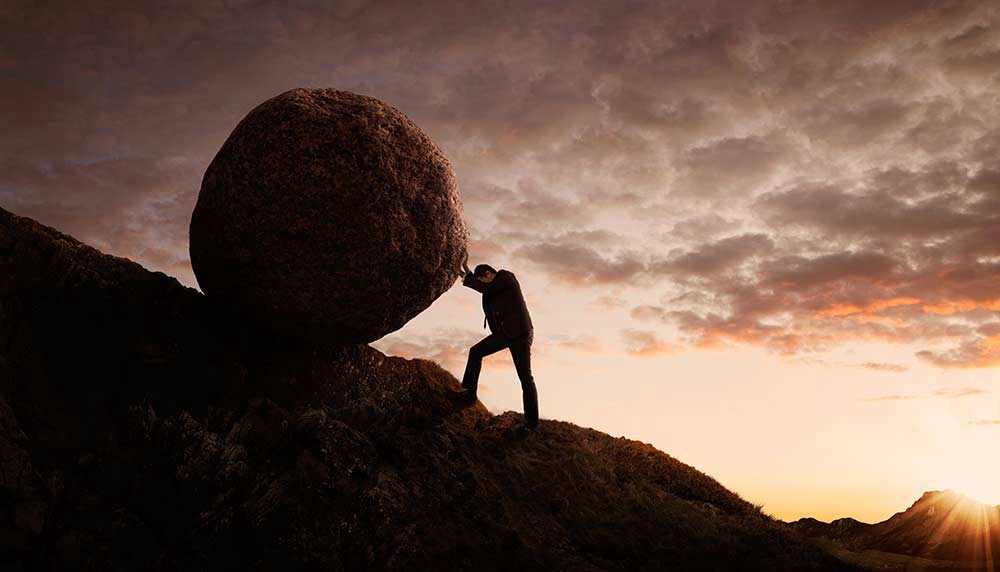
picture credits: https://medium.com/swlh/perseverance-is-a-mind-game-you-need-to-learn-to-play-9093868b8470

Computer Science and Data Science often seems daunting to a new-comer. I remember when I started out learning programming, I was intimidated by the swarm of coders online that were building amazing projects, tools, and products. Forget online, I was borderline depressed by the immense subject knowledge that my peers at University had. I felt like a nobody. I never thought I'd be able to do any of that. It was way too hard! But day after day, line after line, error after error, my knowledge compounded and I became a reasonable software engineer. And now, I'm beginning to explore the world of Data Science. As I learn the foundational concepts, I'm finding myself in the same situation - the same intimidation, the same fear, the same imposter syndrome. But, this time around, I'm also confident that if I put in the hard work, if I learn the foundations well, if I persevere, I will reach where I want to.

So, I want to explore the Kaggle Data Science community and bring to light a few sections of people who persevered, and were duly rewarded. 


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
mcr = pd.read_csv("../input/kaggle-survey-2019/multiple_choice_responses.csv")
other_text_responses = pd.read_csv("../input/kaggle-survey-2019/other_text_responses.csv")
questions = pd.read_csv("../input/kaggle-survey-2019/questions_only.csv")
survey_schema = pd.read_csv("../input/kaggle-survey-2019/survey_schema.csv")

In [ ]:
all_questions = questions.loc[0]
categorical_columns = ['Q1','Q2','Q3','Q4','Q5','Q6','Q10','Q11','Q15','Q23']

In [ ]:
# Helper methods

from collections import Counter
import plotly.graph_objects as go

def isint(v):
    try:
        int(v)
        return True
    except:
        return False
    
def get_value_counts_of_mcr(df, question, percentages=False, ignore_numbers_in_answers=True):
    """
    Returns a DataFrame of index = labels(corresponding to different answers for the question),
                           count = label count 
    DataFrame is sorted in descending order by count
                           
    @param percentages: bool. If True, return percentages instead of counts
    @param ignore_numbers_in_answers: ignore if the answer to the question is a number
    """
    q_options = [col for col in df.columns if col.startswith(question)]
    answer_values = {}
    for q_option in q_options:
        q_option_value_counts = df[q_option].value_counts()
        for answer, answer_count in q_option_value_counts.items():
            if ignore_numbers_in_answers:
                if isint(answer):
                    continue
            if 'OTHER_TEXT' in q_option and answer in ['-1',-1]:
                continue
            if answer in ['None', None]:
                answer = 'Other'
            answer_values[answer] = answer_values.get(answer,0) +  answer_count

    if percentages:
        data_length = sum(answer_values.values())
        answer_values = {ans: (float(val)*100)/float(data_length) 
                         for ans, val in answer_values.items()}
    return pd.DataFrame.from_dict(answer_values,
                                  orient='index',
                                  columns=['count']).sort_values(by='count',
                                                                 ascending=False)

def plot_pie(title, labels, values, colors=None, line=None, **kwargs):
    fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,
                                title=title,
                                showlegend=False,
                                **kwargs)])
    fig.update_traces(hoverinfo='label+percent', textinfo='label',
                      textfont_size=15,
                      marker=dict(
                          colors=colors,
                          line=line,
                      )
                     )
    fig.show()
    
    
def plot_bar(title, x, y, ylabel, xaxis_tickangle=None):
    fig = go.Figure()
    fig.add_trace(go.Bar(x=x,
                        y=y,
                        textposition='auto',))
    fig.update_layout(title=title,
                      yaxis=dict(title=ylabel),
                     xaxis_tickangle=xaxis_tickangle)
    fig.show()


# The Saudis

In [ ]:
actual_data = mcr[1:]

In [ ]:
country_counts = actual_data['Q3'].value_counts()

colors = ['aliceblue']* (len(country_counts.index) - 1) +['crimson'] # Highlighting Saudi Arabia's share
plot_pie("Country Composition of respondents", country_counts.index, country_counts.values,
         colors=colors,
        line=dict(color='#000000', width=0.05))

- Saudi Arabia was the country with the least number of respondents (excluding the other category).

- We all know how beneficial it is to have a thriving local community of experts/beginners in our subject of interest. We can connect with them, we can go to meetups, and improve the collective skillset. Without a vibrant local community, I'm sure these 50 Saudis had to have been relentless in their pursuit of knowledge and education to have come this far. Kudos to them!

In [ ]:
mcr_saudi = mcr[mcr['Q3'] == "Saudi Arabia"]

In [ ]:
roles_value_counts = mcr_saudi['Q5'].value_counts()
plot_pie("Roles of Saudis", roles_value_counts.index, roles_value_counts.values)

In [ ]:
ml_frameworks = get_value_counts_of_mcr(mcr_saudi, 'Q28', percentages=True)[:7]

plot_bar("Top ML frameworks used by Saudis on a regular basis",
        x=ml_frameworks.index,
        y=ml_frameworks['count'].values,
        ylabel="percentages")


# The Startups
- Starting up or working in a startup can be very challenging and taxing. The learning curve is very steep, the hours are long, future look bleak in the beginning, but the satisfcation and the freedom is worth the struggle.

Let's look at the community of people who work in companies sized 0-49 employees

In [ ]:
startups = mcr[mcr['Q6'] == '0-49 employees']

### Let's look at the ML algorithms that are popular at these startups

In [ ]:
startups_ml_algos = get_value_counts_of_mcr(startups, 'Q24', ignore_numbers_in_answers=True)

plot_pie("Popular ML algorithms at Startups",
         startups_ml_algos.index, startups_ml_algos['count'].values)

### Here's how much money they spend on ML/ cloud computing products

In [ ]:
money_spent = get_value_counts_of_mcr(startups, 'Q11', percentages=True)

indices = [idx.replace("-", "to")
          for idx in money_spent.index]
plot_bar("Money they spend on ML/ cloud computing products",
        x=indices,
        y=money_spent['count'].values,
        ylabel="percentages",
        xaxis_tickangle=-45)

# The Compound Effect

- "My life has been a product of compound interest" - Warren Buffett
- "You only need to take a series of tiny steps, consistently, over time, to radically improve your life -Darren Hardy

Here, I want to explore what the community that has been at it the longest(longer than 20 years), and in that community, the sub-community who are earning the most(more than $500k)! Not to conclude correlation implies correlation, but hardwork does pay off!

In [ ]:
longest_coders = pd.concat([mcr.iloc[0:1] ,mcr[mcr['Q15'] == "20+ years"]])
longest_coders_highest_earners = pd.concat([longest_coders.iloc[0:1] ,
                                            longest_coders[longest_coders['Q10'] == "> $500,000"]])

In [ ]:
programming_languages_used = get_value_counts_of_mcr(longest_coders_highest_earners[1:], 'Q18')

plot_pie("Programming languages used by those coding since +20 years and earning > 500k USD",
        programming_languages_used.index, programming_languages_used['count'].values)

Go start learning!

In [ ]:
veterans_programming_languages_advocated = get_value_counts_of_mcr(longest_coders_highest_earners[1:], 'Q19')

plot_pie("Programming languages advocated by high-earning veterans for aspiring data scientists",
        programming_languages_used.index, programming_languages_used['count'].values)

# The DataScientist Wannabes

Finally, let's look at those of us seeking the 'sexiest job of the 21st century', i.e. those of us who have been using code to analyze data since < 1 year (of which I am a part!)

These are the group of people, who with the right guidance and support, and with the right mentality, can learn to become experts at working with data(supposedly the new oil). 

Let's do this. All the best to everyone!

In [ ]:
wannabes = mcr[mcr['Q15'] == '< 1 years']

### Top Countries Share

In [ ]:
top_5_country_share = wannabes['Q3'].value_counts()[:10]

plot_bar("Top countries' share",
        x=top_5_country_share.index,
        y=top_5_country_share.values,
        ylabel="Counts")

- No surprises here. I'm Indian too.

### How do the programming languages used by the wannabes compare to the languages advocated by the longest coders to aspiring data scientists? Are we incorporating their wisdom?

In [ ]:
wannabe_programming_languages_used = get_value_counts_of_mcr(wannabes, 'Q18', percentages=True)[:8]
veterans_programming_languages_advocated = get_value_counts_of_mcr(longest_coders, 'Q19', percentages=True)[:8]

wannabe_pls = wannabe_programming_languages_used.copy()
veterans_pla = veterans_programming_languages_advocated.copy()
wannabe_pls['category'] = "Wannabes"
veterans_pla['category'] = "Veterans advocate"
wv = pd.concat([wannabe_pls, veterans_pla])



fig = go.Figure()
fig.add_trace(go.Bar(x=wannabe_pls.index,
                     y=wannabe_pls['count'].values,
                    name="Wannabes use"))
fig.add_trace(go.Bar(x=veterans_pla.index,
                     y=veterans_pla['count'].values,
                    name="Veterans advocate"))
fig.update_layout(yaxis=dict(title="percentages"))
fig.show()


- For the most part we are.
- One interesting thing to note here is how the use of Javascript for the web (which is a relatively recent trend) only appears on the list of the wannabes
- WE SHOULD BE LEARNING MORE OF PYTHON!

### NLP and Computer Vision are at the forefront of AI now. This is how this group is exploring these areas!

In [ ]:
cv = get_value_counts_of_mcr(wannabes, 'Q26')
cv['category'] = "Computer Vision"
nlp = get_value_counts_of_mcr(wannabes, 'Q27')
nlp['category'] = "NLP"


In [ ]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2,
                   specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=cv.index, 
                    values=cv['count'].values,
                    title="Computer Vision",
                    ), 1,1)

fig.add_trace(go.Pie(labels=nlp.index, 
                    values=nlp['count'].values,
                    title="NLP",
                    ), 1, 2)
fig.update(layout_showlegend=False)
fig.update_traces(hoverinfo='label+percent+name', textinfo='label', textfont_size=15)

fig.show()